# LetsGrowMore - Advanced Level Task - 2

### Next Word Prediction

#### Task Description

Using Tensorflow and Keras library train a RNN, to predict the next word.For problem statements and guidance, 
Watch Tutorial from here: https://youtu.be/CBCfOTePVPo : 

Reference Provided - https://thecleverprogrammer.com/2020/07/20/next-word-prediction-model/

Dataset Link Provided - https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

### 1) Importing The Necessary Libraries

In [1]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

### 2) Importing The Dataset

In [2]:
file = '1661-0.txt'
dataset = open(file, encoding='utf-8').read().lower()
print('Dataset length:', len(dataset))

Dataset length: 581888


### 3) Splitting The Dataset Into Each Word In Order Without The Presence Of Some Special Characters.

In [3]:
tokenizer = RegexpTokenizer("[\w']+")
data = tokenizer.tokenize(dataset)
data

['project',
 "gutenberg's",
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doyle',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'net',
 'title',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'author',
 'arthur',
 'conan',
 'doyle',
 'release',
 'date',
 'november',
 '29',
 '2002',
 'ebook',
 '1661',
 'last',
 'updated',
 'may',
 '20',
 '2019',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf',
 '8',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'produced',
 'by',
 'an',
 'anonymo

### 4) Performing Feature Engineering In Our Data

Feature Engineering means taking whatever information we have about our problem and turning it into numbers that we can use to build our feature matrix. 

In [4]:
words = np.unique(data)
unique_word = dict((c, i) for i, c in enumerate(words))
unique_word

{"'as": 0,
 '0': 1,
 '000': 2,
 '1': 3,
 '10': 4,
 '100': 5,
 '1000': 6,
 '10_s_': 7,
 '10th': 8,
 '11': 9,
 '117': 10,
 '120': 11,
 '12_s_': 12,
 '12th': 13,
 '14': 14,
 '140': 15,
 '15': 16,
 '150': 17,
 '1500': 18,
 '1661': 19,
 '16a': 20,
 '17': 21,
 '1846': 22,
 '1858': 23,
 '1869': 24,
 '1870': 25,
 '1878': 26,
 '1883': 27,
 '1884': 28,
 '1887': 29,
 '1888': 30,
 '1890': 31,
 '19th': 32,
 '1_s_': 33,
 '2': 34,
 '20': 35,
 '200': 36,
 '2001': 37,
 '2002': 38,
 '2019': 39,
 '220': 40,
 '221b': 41,
 '226': 42,
 '22nd': 43,
 '249': 44,
 '25': 45,
 '250': 46,
 '26': 47,
 '26_s_': 48,
 '27': 49,
 '270': 50,
 '29': 51,
 '2_s_': 52,
 '2nd': 53,
 '3': 54,
 '30': 55,
 '31': 56,
 '35': 57,
 '3rd': 58,
 '4': 59,
 '40': 60,
 '4000': 61,
 '421': 62,
 '4700': 63,
 '4_d_': 64,
 '4th': 65,
 '4½': 66,
 '5': 67,
 '50': 68,
 '501': 69,
 '596': 70,
 '6': 71,
 '60': 72,
 '6221541': 73,
 '64': 74,
 '6_d_': 75,
 '7': 76,
 '700': 77,
 '750': 78,
 '750175': 79,
 '77': 80,
 '7_s_': 81,
 '7th': 82,
 '8': 83

In [5]:
word_length = 6
prev_words = []
next_words = []

for i in range(len(data) - word_length):
    prev_words.append(data[i:i + word_length])
    next_words.append(data[i + word_length])
    
print(prev_words[0])
print(next_words[0])

['project', "gutenberg's", 'the', 'adventures', 'of', 'sherlock']
holmes


Now we create two numpy arrays, x for storing the features and y for storing its corresponding label. 

In [6]:
x = np.zeros((len(prev_words), word_length, len(words)), dtype=bool)
y = np.zeros((len(next_words), len(words)), dtype=bool)

Now, we iterate x and y. If the word is available, the corresponding position becomes 1

In [7]:
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        x[i, j, unique_word[each_word]] = 1
    y[i, unique_word[next_words[i]]] = 1

Here, we can view the single sequence of words

In [8]:
print(x[0][0])

[False False False ... False False False]


### 5) Building The RNN (Recurrent Neural Network) LSTM Deep Learning Model

In [9]:
model = Sequential()
model.add(LSTM(128, input_shape=(word_length, len(words))))
model.add(Dense(len(words)))
model.add(Activation('softmax'))

#### Training The Next Word Prediction Model

Now, we train the next word prediction model with a maximum of 5 epochs

In [10]:
optimizer = RMSprop(lr = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
history = model.fit(x, y, validation_split = 0.05, batch_size = 128, epochs = 5, shuffle = True).history

Epoch 1/5


C:\Users\hp\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


811/811 [==============================] - 132s 161ms/step - loss: 6.0005 - accuracy: 0.1087 - val_loss: 7.0644 - val_accuracy: 0.0976
Epoch 2/5
811/811 [==============================] - 138s 170ms/step - loss: 5.7756 - accuracy: 0.1486 - val_loss: 7.8865 - val_accuracy: 0.0985
Epoch 3/5
811/811 [==============================] - 128s 158ms/step - loss: 5.7450 - accuracy: 0.1774 - val_loss: 7.8883 - val_accuracy: 0.1066
Epoch 4/5
811/811 [==============================] - 129s 159ms/step - loss: 5.4256 - accuracy: 0.2130 - val_loss: 8.1665 - val_accuracy: 0.1046
Epoch 5/5
811/811 [==============================] - 135s 167ms/step - loss: 5.0788 - accuracy: 0.2529 - val_loss: 8.4646 - val_accuracy: 0.0992


Saving the model for future use, before evaluating it.

In [14]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

### 6) Evaluating The Model Based On It's Accuracy

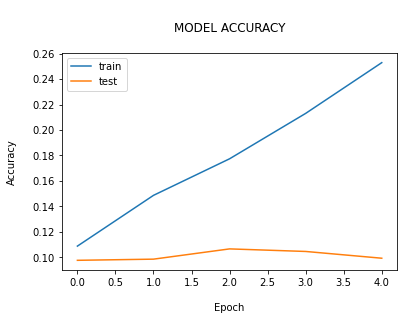

In [32]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('\nMODEL ACCURACY\n')
plt.ylabel('Accuracy\n')
plt.xlabel('\nEpoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

### 7) Evaluating The Model Based On It's Loss

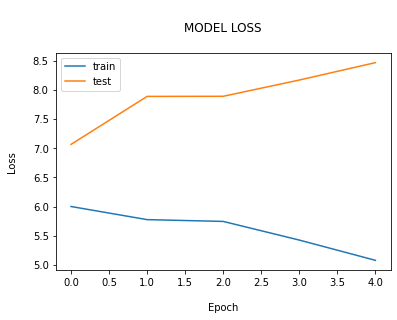

In [35]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('\nMODEL LOSS\n')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 8) Testing The Model

Building a python program to predict the next word using our trained model. 

In [36]:
def new_function(data):
    x = np.zeros((1, word_length, len(words)))
    for t, word in enumerate(data.split()):
        print(word)
        x[0, t, unique_word[word]] = 1
    return x
new_function("Trying out a sentence here".lower())

trying
out
a
sentence
here


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

Creating a function to return samples

In [23]:
def second_func(preds, top_n = 3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

Creating a function for next word prediction, that predicts multiple characters.

In [27]:
def predict_completions(text, n = 3):
    if text == "":
        return("0")
    x = new_function(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = second_func(preds, n)
    return [words[idx] for idx in next_indices]

Now, making use of a sequence of 40 characters that can be used as a base for predictions.

In [37]:
para = [
    "Attitude is a little thing that makes a big difference.",
    "That which does not kill us makes us stronger.",
    "Light the candle instead of cursuing darkness.",
    "Are you lost baby girl?",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

### 9) Using The Model To Predict The Next Word

In [38]:
for p in para:
    seq = " ".join(tokenizer.tokenize(p.lower())[0:5])
    print("Sequence: ", seq)
    print("\nnext possible words: ", predict_completions(seq, 5))

Sequence:  attitude is a little thing
attitude
is
a
little
thing

next possible words:  ['holmes', 'with', 'our', 'out', 'do']
Sequence:  that which does not kill
that
which
does
not
kill

next possible words:  ['to', 'with', 'and', 'he', 'but']
Sequence:  light the candle instead of
light
the
candle
instead
of

next possible words:  ['to', 'of', 'upon', 'and', 'small']
Sequence:  are you lost baby girl
are
you
lost
baby
girl

next possible words:  ['might', 's', 'may', 'so', 'would']
Sequence:  it is hard enough to
it
is
hard
enough
to

next possible words:  ['it', 'and', 'to', 'me', 'him']


### CONCLUSION

Using The Deep Learning LSTM RNN Model, we were able to predict the next word of sentences successfully.